<AxesSubplot: title={'center': 'Histogram of the age variable'}, ylabel='Frequency'>

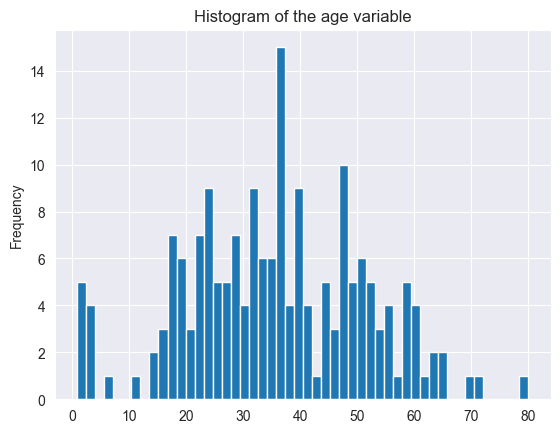

In [16]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset('titanic')
titanic = titanic.copy()
titanic = titanic.dropna()
titanic['age'].plot.hist(
  bins = 50,
  title = "Histogram of the age variable"
)

## Zscore

In [17]:
from scipy.stats import zscore
titanic["age_zscore"] = zscore(titanic["age"])
titanic["is_outlier"] = titanic["age_zscore"].apply(
  lambda x: x <= -2.5 or x >= 2.5
)
titanic[titanic["is_outlier"]]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_zscore,is_outlier
630,1,1,male,80.0,0,0,30.0,S,First,man,True,A,Southampton,yes,True,2.83948,True


## DBSCAN

<AxesSubplot: xlabel='age', ylabel='fare'>

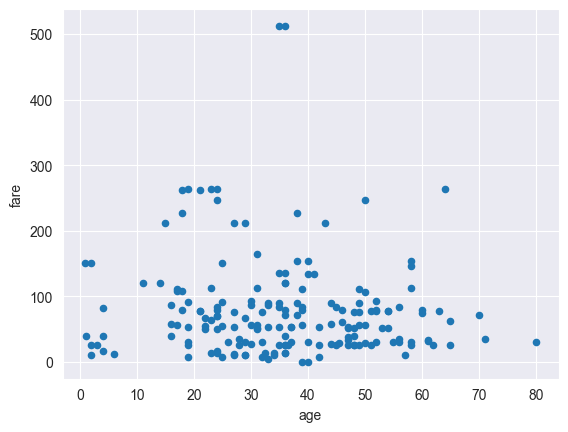

In [18]:
ageAndFare = titanic[["age", "fare"]]
ageAndFare.plot.scatter(x = "age", y = "fare")

<AxesSubplot: xlabel='age', ylabel='fare'>

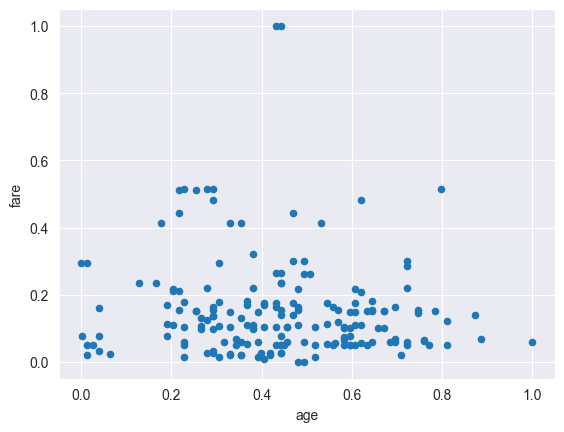

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ageAndFare = scaler.fit_transform(ageAndFare)
ageAndFare = pd.DataFrame(ageAndFare, columns = ["age", "fare"])
ageAndFare.plot.scatter(x = "age", y = "fare")

In [26]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
  eps = 0.05,
  metric="euclidean",
  min_samples = 3,
  n_jobs = -1)
clusters = outlier_detection.fit_predict(ageAndFare)

clusters

array([ 0,  0,  0,  1,  0,  0,  0,  2,  0,  3,  0,  0,  0,  2,  0, -1,  0,
        0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0, -1,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  3,
        0,  0, -1, -1, -1,  0,  0,  0,  2, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  2,  0,  0,  3,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  3,  0,  0,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,
       -1,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,
        0,  2, -1,  0,  1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

<AxesSubplot: xlabel='age', ylabel='fare'>

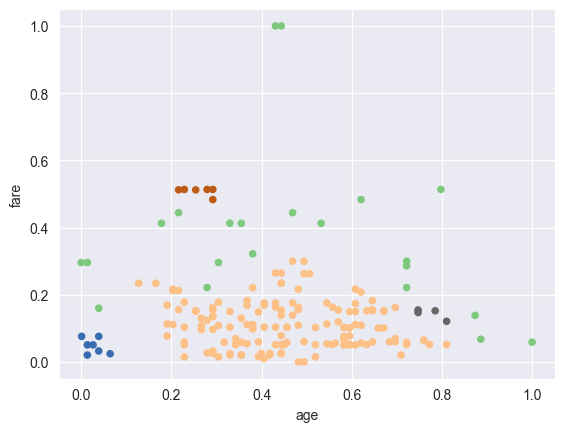

In [27]:
from matplotlib import cm
cmap = cm.get_cmap('Accent')
ageAndFare.plot.scatter(
  x = "age",
  y = "fare",
  c = clusters,
  cmap = cmap,
  colorbar = False
)